In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from PIL import Image
from IPython.display import Image as IPythonImage

In [2]:
%matplotlib inline

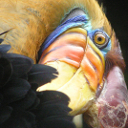

In [3]:
IPythonImage("bird_small.jpg")


In [4]:
im = Image.open("bird_small.jpg")
imdata = np.asarray(im)
imdata.shape

(128, 128, 3)

In [5]:
all_pixels = imdata.reshape(-1, 3).astype(np.float)
all_pixels.shape

(16384, 3)

In [6]:
kmeans = KMeans(8)
kmeans.fit(all_pixels)
pixel_groups = kmeans.predict(all_pixels)

In [7]:
pixel_groups[0:100]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5,
       5, 2, 5, 4, 3, 6, 1, 1], dtype=int32)

In [8]:
# new_colors = np.array([color.tolist()[::-1] for color in kmeans.cluster_centers_]).astype(np.int)
new_colors = kmeans.cluster_centers_.astype(np.int)

In [9]:
new_pixels = np.array([new_colors[c] for c in pixel_groups])
new_pixels.shape

(16384, 3)

In [10]:
new_image_data = new_pixels.reshape((128, 128, 3))

In [16]:
import scipy
scipy.misc.imsave('bird_small_resample.jpg', new_image_data)

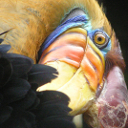

In [12]:
IPythonImage("bird_small.jpg")


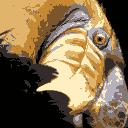

In [13]:
IPythonImage('bird_small_resample.jpg')

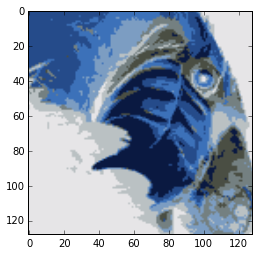

In [14]:
plt.imshow(np.asarray(new_image_data))